## Search and download Sentinel-2 COGS hosted on AWS

- AWS bucket description: https://registry.opendata.aws/sentinel-2-l2a-cogs/
- Original tutorial: http://www.acgeospatial.co.uk/stac-cog-python-and-qgis/

This asset has the SpatioTemporal Asset Catalog (STAC) metadata so that it can be queried by the STAC API, which is used by the ``satsearch`` module.

In [21]:
# !pip install sat-search 

from satsearch import Search
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

In [15]:
search = Search(bbox=[-110, 39.9, -109.9, 40], datetime='2020-05-01/2020-05-10', url='https://earth-search.aws.element84.com/v0')
print('bbox search: %s items' % search.found())

items = search.items()
print('%s items' % len(items))
print('%s collections' % len(items._collections))
print(items._collections)

bbox search: 12 items
12 items
3 collections
[sentinel-s2-l2a, sentinel-s2-l2a-cogs, sentinel-s2-l1c]


In [16]:
search = Search(bbox=[-110, 39.9, -109.9, 40], collections=['sentinel-s2-l2a-cogs'], datetime='2020-05-01/2020-05-10', url='https://earth-search.aws.element84.com/v0')
print('bbox search: %s items' % search.found())

items = search.items() 
print(items.summary(['date', 'id', 'eo:cloud_cover'])) 

bbox search: 4 items
Items (4):
date                      id                        eo:cloud_cover            
2020-05-09                S2A_12TWK_20200509_0_L2A  0.55                      
2020-05-07                S2B_12TWK_20200507_0_L2A  86.63                     
2020-05-04                S2B_12TWK_20200504_0_L2A  16.23                     
2020-05-02                S2A_12TWK_20200502_0_L2A  83.98                     



In [20]:
print(items[0].asset('red'))
file_url = items[0].asset('red')['href']

{'title': 'Band 4 (red)', 'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/12/T/WK/2020/5/S2A_12TWK_20200509_0_L2A/B04.tif', 'proj:shape': [10980, 10980], 'proj:transform': [10, 0, 499980, 0, -10, 4500000, 0, 0, 1]}


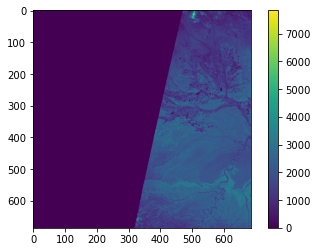

In [23]:
with rasterio.open(file_url) as src:
   # List of overviews from biggest to smallest
   oviews = src.overviews(1)
   # Retrieve the smallest thumbnail
   oview = oviews[-1]
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
   thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
plt.imshow(thumbnail)
plt.colorbar()

## Search and download ArcticDEM strips on the PGC server

- https://pypi.org/project/arcticdem/
- only CLI: makes sences since it usually takes a long while (hours to days) for downloading large amount of data